In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
list_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden"
]

df_EU_wsalary = df[df['job_country'].isin(list_countries)].dropna(subset='salary_year_avg').copy()

In [5]:
job_titles = df_EU_wsalary['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [10]:
df_EU_wsalary = df_EU_wsalary[df_EU_wsalary['job_title_short'].isin(job_titles)]

In [19]:
order = df_EU_wsalary.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

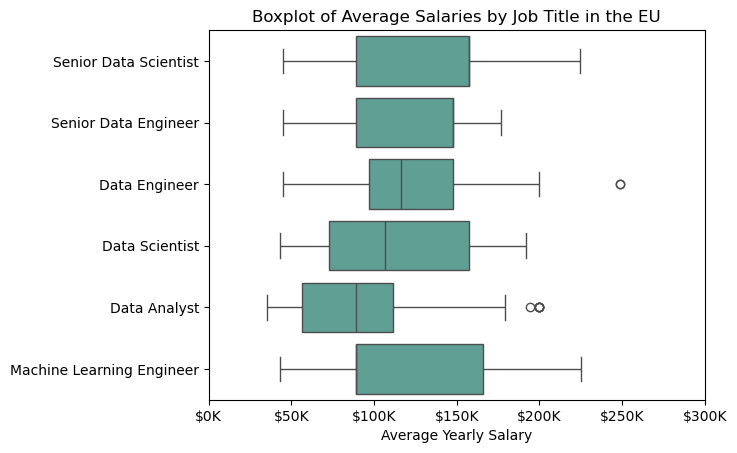

In [24]:
import seaborn as sns

sns.boxplot(data=df_EU_wsalary, x='salary_year_avg', y='job_title_short', order=order, hue=df_EU_wsalary['salary_year_avg'].median(), legend=False, palette='dark:#5A9_r')

plt.xlabel('Average Yearly Salary')
plt.ylabel('')
plt.title('Boxplot of Average Salaries by Job Title in the EU')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 300000)
plt.show()

In [26]:
best2 = ['Data Scientist', 'Data Engineer']

df_EU_DES = df[(df['job_title_short'].isin(best2)) & (df['job_country'].isin(list_countries))].copy()

In [27]:
df_EU_DES = df_EU_DES.dropna(subset=['salary_year_avg'])

In [28]:
df_EU_DES = df_EU_DES.explode('job_skills')

In [37]:
DF_DES_tp = df_EU_DES.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
DF_DES_tp = DF_DES_tp[DF_DES_tp['count'] >= 30]
DF_DES_tp = DF_DES_tp.sort_values(by='median', ascending=False).head(6)
DF_DES_tp

,count,median
job_skills,,
redshift,32,140500.0
github,30,136750.0
pytorch,34,135780.0
snowflake,54,133870.5
airflow,85,133500.0
bigquery,43,133500.0


In [38]:
DF_DES_tc = df_EU_DES.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
DF_DES_tc = DF_DES_tc.sort_values(by='count', ascending=False).head(6)
DF_DES_tc = DF_DES_tc.sort_values(by='median', ascending=False)
DF_DES_tc

,count,median
job_skills,,
spark,208,132500.0
aws,177,131580.0
sql,344,120000.0
python,404,113087.5
azure,144,98301.5
java,103,98283.0


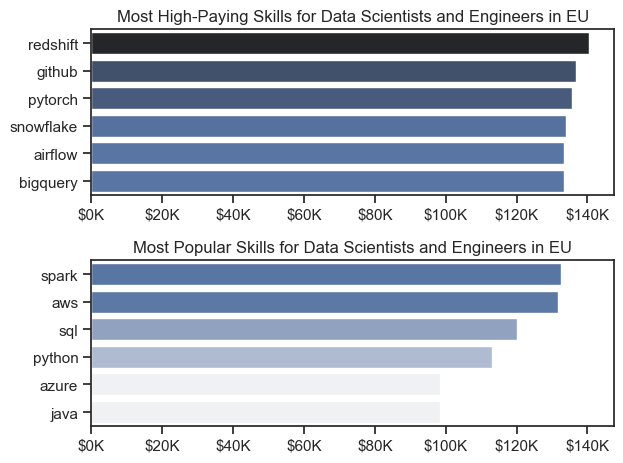

In [39]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")


sns.barplot(data=DF_DES_tp, x='median', y=DF_DES_tp.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
# df_toppay.plot(kind='barh', y='median', ax=ax[0], legend=False)
# invert_yaxis()
ax[0].set_title('Most High-Paying Skills for Data Scientists and Engineers in EU')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))


sns.barplot(data=DF_DES_tc, x='median', y=DF_DES_tc.index, ax=ax[1], hue='median', palette='light:b', legend=False)
# df_popular[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False) #[::-1] - более краткий вариант invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Most Popular Skills for Data Scientists and Engineers in EU')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

fig.tight_layout()
plt.show()